In [ ]:
!wget https://raw.githubusercontent.com/QwanXiong/NN_properties/main/enrg_s0_train.txt
!wget https://raw.githubusercontent.com/QwanXiong/NN_properties/main/grad_1_train.txt
!wget https://raw.githubusercontent.com/QwanXiong/NN_properties/main/geom.txt
!wget https://raw.githubusercontent.com/QwanXiong/NN_properties/main/nacdr_1_2_train.txt
!wget https://raw.githubusercontent.com/QwanXiong/NN_properties/main/nac_1_2_purified_from_NAC_fit_dE.txt
!wget https://raw.githubusercontent.com/QwanXiong/NN_properties/main/nacdr_1_2_purified_from_NAC_fit.txt

--2023-04-10 14:20:05--  https://raw.githubusercontent.com/QwanXiong/NN_properties/main/enrg_s0_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76000 (74K) [text/plain]
Saving to: ‘enrg_s0_train.txt.3’

enrg_s0_train.txt.3 100%[===================>]  74.22K  --.-KB/s    in 0.001s  

2023-04-10 14:20:05 (85.1 MB/s) - ‘enrg_s0_train.txt.3’ saved [76000/76000]

--2023-04-10 14:20:05--  https://raw.githubusercontent.com/QwanXiong/NN_properties/main/grad_1_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 766545 (749K

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
bohr_to_ang = 0.529177

In [ ]:
geom = np.loadtxt('geom.txt')
geom = geom.reshape((4000,6,3),order='C')*bohr_to_ang
enrg_s0 = np.loadtxt('enrg_s0_train.txt').reshape(4000,1)
grad_s0 = np.loadtxt('grad_1_train.txt').reshape((4000,6,3),order='C')/bohr_to_ang
z = np.array([6,7,1,1,1,1],dtype='uint8')
nac_s0_s1 = np.loadtxt('nac_1_2_purified_from_NAC_fit_dE.txt').reshape((4000,6,3),order='C')/bohr_to_ang
#nac_s0_s1 = np.loadtxt('nacdr_1_2_train.txt').reshape((4000,6,3),order='C')/bohr_to_ang


In [ ]:
#de/dang = de/dbohr*dbohr/dang = 1/bohr_to_ang*de/dang
#bohr = ang/bohr_to_ang

In [ ]:
forces_s0 = -np.copy(grad_s0)
forces_nac = -np.copy(nac_s0_s1)

In [ ]:
#forces_s0+grad_s0

In [ ]:
geom_train,geom_test, enrg_s0_train, enrg_s0_test,nac_s0_s1_train,nac_s0_s1_test = \
train_test_split(geom,enrg_s0,forces_nac,test_size=0.1,random_state=42, shuffle=True)

In [ ]:
nac_s0_s1_train.shape

(3600, 6, 3)

In [ ]:
with open('ch2nh2+_pot_train.npz','wb') as fil:
  np.savez(fil,E=enrg_s0_train,F=nac_s0_s1_train,z=z,R=geom_train )

with open('ch2nh2+_pot_test.npz','wb') as fil:
  np.savez(fil,E=enrg_s0_test,F=nac_s0_s1_test,z=z,R=geom_test )

In [ ]:
with np.load('ch2nh2+_pot_test.npz') as fil:
  print(fil.files)
  print(fil['R'].shape)

['E', 'F', 'z', 'R']
(400, 6, 3)


In [ ]:
%%capture
# install wandb
!pip install wandb
# install nequip
!git clone --depth 1 "https://github.com/mir-group/nequip.git"
!pip install nequip/
# fix colab imports
import site
site.main()
# set to allow anonymous WandB
import os
os.environ["WANDB_ANONYMOUS"] = "must"
import numpy as np
import torch
from ase.io import read, write
np.random.seed(0)
torch.manual_seed(0)

In [ ]:
!cp nequip/configs/example.yaml nequip/configs/example_ch2nh2.yaml

In [ ]:
!rm -rf ./results
!nequip-train nequip/configs/example_ch2nh2.yaml

wandb: Currently logged in as: anony-mouse-538553. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.14.2
wandb: Run data is saved locally in /content/wandb/run-20230410_142108-qvdpzm2m
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run example-run-toluene
wandb: ⭐️ View project at https://wandb.ai/anony-mouse-538553/toluene-example?apiKey=2321139e10ca7f1703eb25e7939779e24e5b82b2
wandb: 🚀 View run at https://wandb.ai/anony-mouse-538553/toluene-example/runs/qvdpzm2m?apiKey=2321139e10ca7f1703eb25e7939779e24e5b82b2
wandb: WARNING Do NOT share these links with anyone. They can be used to claim your runs.
Torch device: cuda
Processing dataset...
Loaded data: Batch(batch=[21600], cell=[3600, 3, 3], edge_cell_shift=[107904, 3], edge_index=[2, 107904], forces=[21600, 3], pbc=[3600, 3], pos=[21600, 3], ptr=[3601], total_energy=[3600, 1])
    processed data size: ~3.72 MB
Cached processed data to disk
Done!
Successfully loaded the data set of t

In [ ]:
!nequip-deploy build --train-dir results/toluene/example-run-toluene ch2nh2-deployed.pth

INFO:root:Loading best_model from training session...
INFO:root:Compiled & optimized model.


In [ ]:
!nequip-evaluate --train-dir results/toluene/example-run-toluene --batch-size 50

Using device: cuda
Loading model... 
loaded model from training session
Loading original dataset...
Loaded dataset specified in config.yaml.
Using origial training dataset (3600 frames) minus training (2000 frames) and validation frames (200 frames), yielding a test set size of 1400 frames.
Starting...
  0% 0/1400 [00:00<?, ?it/s]

  4% 50/1400 [00:00<00:16, 80.64it/s]
  7% 100/1400 [00:01<00:16, 78.34it/s]
 11% 150/1400 [00:03<00:32, 38.83it/s]

 18% 250/1400 [00:03<00:13, 82.51it/s]

 25% 350/1400 [00:03<00:07, 133.45it/s]

 32% 450/1400 [00:03<00:04, 191.64it/s]

 39% 550/1400 [00:04<00:03, 253.60it/s]

 46% 650/1400 [00:04<00:02, 315.34it/s]

 54% 750/1400 [00:04<00:01, 375.47it/s]

 61% 850/1400 [00:04<00:01, 429.94it/s]

 68% 950/1400 [00:04<00:00, 471.38it/s]

 75% 1050/1400 [00:04<00:00, 513.04it/s]

 82% 1150/1400 [00:04<00:00, 545.72it/s]

 89% 1250/1400 [00:05<00:00, 567.33it/s]

 96% 1350/1400 [00:05<00:00, 580.14it/s]
100% 1400/1400 [00:05<00:00, 260.13it/s]


--- Final re

In [ ]:
from nequip.ase.nequip_calculator import NequIPCalculator

In [ ]:
model_s0 = NequIPCalculator.from_deployed_model(f"ch2nh2-deployed.pth")

/usr/local/lib/python3.9/dist-packages/nequip/ase/nequip_calculator.py:73: UserWarning: Trying to use chemical symbols as NequIP type names; this may not be correct for your model! To avoid this warning, please provide `species_to_type_name` explicitly.
  warnings.warn(


In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
FOLDER = "/content/drive/MyDrive/init_models"

In [ ]:
mol = read(f"{FOLDER}/CH2NH2+_random.xyz")

In [ ]:
mol.get_potential_energy()

-94.46443673

In [ ]:
model_s0.get_potential_energy(mol)

0.2453414648771286

In [ ]:
grad_pred = np.zeros((2000,18))
enrg_pred = np.zeros(2000)
for i in range(2000):
  if (i % 200 ==0):
    print(i)
  mol.set_positions(geom[i,:])
  ff = model_s0.get_forces(mol).astype('float64')
  enrg_pred[i] = model_s0.get_potential_energy(mol)
  grad_pred[i,:] = np.copy(ff).reshape(-1,)

0
200
400
600
800
1000
1200
1400
1600
1800


In [ ]:
import matplotlib.pyplot as plt

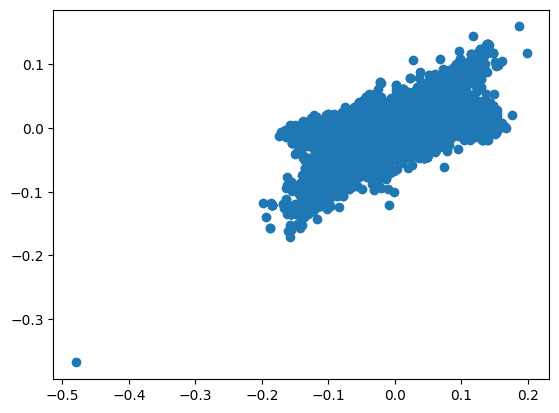

In [ ]:
plt.scatter(nac_s0_s1[:2000,:],-grad_pred[:2000,:])

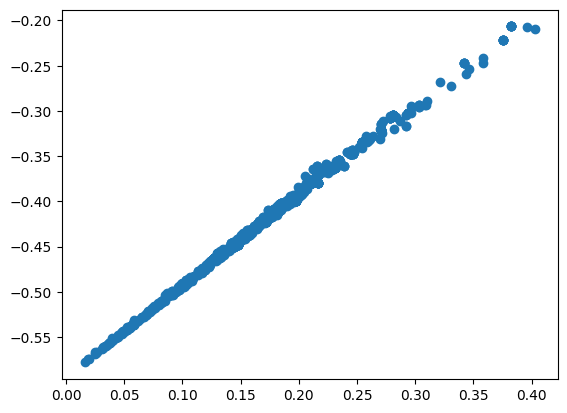

In [ ]:
plt.scatter(enrg_s0[:1000],enrg_pred[:1000])